In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To open a file, use the .open() command. Put the filename inside. Since the file is in the same directory as
# the code, you don't need additional addresses.
file = up.open("DataR_CH0@V2740B_22575_Board12_5V_100Hz_13usrisetime_120Hznoise.root")

In [3]:
# This shows what the contents of the file are. Both of them are TTrees, classic data structure in ROOT.
file.classnames()

{'Data_R;17': 'TTree', 'Data_R;16': 'TTree'}

<TArrayS [42, 38, 52, ...,  0,  0,  0] at 0x000173aa6550>


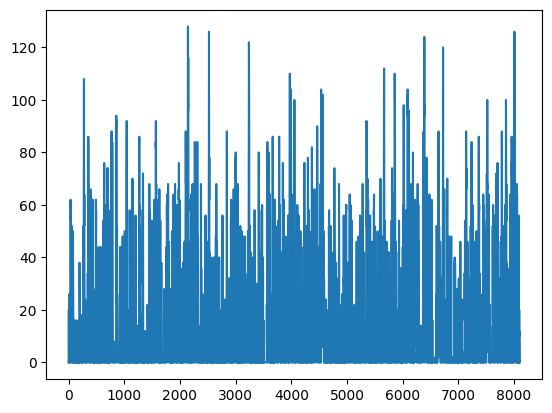

In [52]:
test_array = file["Data_R;17"]["Samples"]
array2 = test_array.array(library="np")
print(array2[0])
plt.plot(array2[89009])

In [6]:
tree = file["Data_R;17"]
tree.keys()
# .keys() shows the contents of the TBranch (get it? branches of the TTree haha)

['Channel', 'Timestamp', 'Board', 'Energy', 'Flags', 'Probe', 'Samples']

In [17]:
branch = tree["Samples"]
data = branch.arrays()
print(data[0])
# The data structure is like this: A big list consisting of individual dictionaries where 
# each data point is a dictionary with one key:value pair and the value is the data point

KeyboardInterrupt: 

This error occurred while calling

    ak.from_iter(
        iterable = generator-instance
        allow_record = True
        highlevel = False
        behavior = None
        initial = 1024
        resize = 8
    )

In [106]:
# Unpacking the weird data structure
energy = []
for val in data:
    energy.append(val["Energy"])

energy = np.array(energy)
print(energy)

[3 8 1 ... 4 3 1]


Text(0, 0.5, 'Counts')

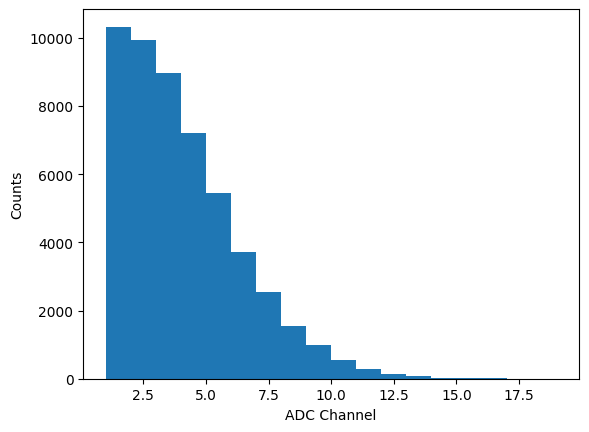

In [108]:
#num_bin = 200
bin = np.linspace(1, 19, 19)
#plt.xlim(1240, max(energy))
n, bins, patches = plt.hist(energy, bins=bin)
#plt.title("Peak values for 6 us shaping time (room temp)")
plt.xlabel("ADC Channel")
plt.ylabel("Counts")

In [109]:
from scipy.optimize import curve_fit
def Gauss(x, A, mean, std):
  gauss = A*np.exp(-(x-mean)**2/(2*std**2))
  return gauss

In [111]:
popt, pcov = curve_fit(Gauss, bin[0:18], n, p0=[10000, 0, 10])
print(popt)
print(np.sqrt(np.diag(pcov)))

[1.03930357e+04 9.14087711e-01 3.62372486e+00]
[7.49231301e+01 8.49703615e-02 5.50111103e-02]


3.623724864441575


Text(0, 0.5, 'Counts')

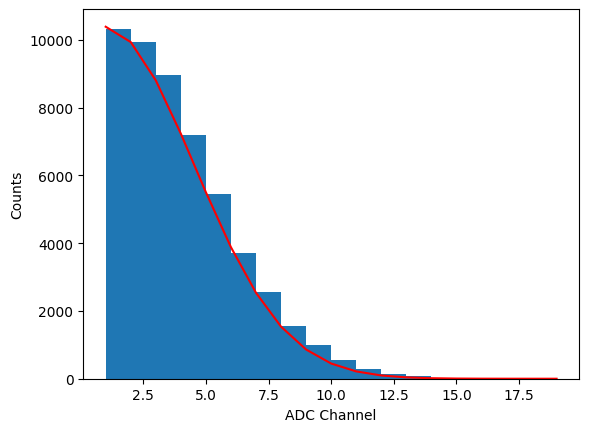

In [113]:
plt.plot(bin, Gauss(bin, *popt), color="red")
n2, b2, p2 = plt.hist(energy, bins=bin)
print(popt[2])
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
#plt.xlim(1260, max(energy))

In [98]:
# ADC Channel to energy conversion
# Each ADC is 30 uV b/c Peak-Peak max for CAEN is 2 V and there's 2^16 bits -> 2 V/65536 = 30.5 uV
# From V -> eV: peak V = 1.875 MeV
# Update: can go directly from peak ADC to energy units by equating the peak energy to 1.875 MeV
# Make sure to fit the curve to the ADC data first to use the curve fitted mean as the peak value
peak = 1289.45338005
#volts_conv_factor = 1.875e3/peak # volts to keV
#in_volts = energy * 30e-6
#in_eV = in_volts * volts_con_factor
one_ADC = 1.791e3/peak
in_keV = energy*one_ADC
stdev_keV = popt[2] * one_ADC
print(stdev_keV)

9.482088034251026


In [100]:
ans = 9.482/one_ADC
print(ans)

6.826687297394807


In [14]:
#new_stdev50_array = np.array([19.302, 19.692, 11.965, 11.622, 12.451, 14.842, 14.483, 14.927, 15.916, 16.0, 16.781, 18.470, 22.539])
new2_stdev50_array = np.array([9.898])
new_stdeverr50_array = np.array([0.007, 0.007, 0.002, 0.002, 0.002, 0.003, 0.003, 0.002, 0.003, 0.003, 0.002, 0.003, 0.003, 0.004])
new_stdev10_array = np.array([6.690, 6.662, 7.538, 6.716, 7.386, 7.454, 7.963, 8.093, 8.474, 8.710, 9.439])
new_stdeverr10_array = np.array([0.0008, 0.0004, 0.0009, 0.0005, 0.0007, 0.0007, 0.0008, 0.0006, 0.0006, 0.0009, 0.0009])
new_stdev100_array = np.array([13.352, 13.443, 13.834, 14.440, 15.250, 15.739, 16.929, 19.137, 18.865, 20.552, 22.141])
new_stdeverr100_array = np.array([])
new_FWHM50_array = new2_stdev50_array * 2 * np.sqrt(2)
new_FWHMerr50_array = new_stdeverr50_array * 2 * np.sqrt(2)
new_FWHM10_array = new_stdev10_array * 2 * np.sqrt(2)
new_FWHMerr10_array = new_stdeverr10_array * 2 * np.sqrt(2)
new_FWHM100_array = new_stdev100_array * 2 * np.sqrt(2)
new_time50_array = np.array([13, 12, 11])
new_time10_array = np.array([13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3])

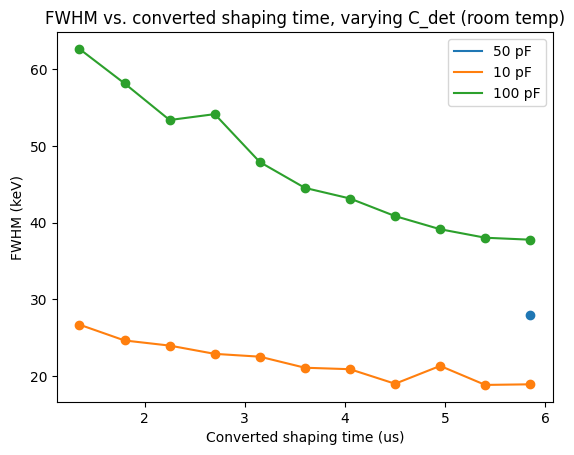

In [16]:
plt.plot(13*0.45, new_FWHM50_array, label="50 pF")
plt.plot(new_time10_array*0.45, new_FWHM10_array, label="10 pF")
plt.plot(new_time10_array*0.45, new_FWHM100_array, label="100 pF")
##
#stdev_array2 = np.array([9.553, 7.497, 6.595, 5.996, 5.727, 5.545, 5.465, 5.403])
#stdev_corr_array2 = stdev_array2 * 0.924266
#rise_time2 = np.array([1, 2, 3, 5, 6, 7, 8, 9])
#FWHM_array2 = stdev_corr_array2*2*np.sqrt(2)
#rise_corr_time2 = rise_time2 * 0.45
##
#plt.plot(rise_corr_time2, FWHM_array2, label="50 pF")
#plt.scatter(rise_corr_time2, FWHM_array2)
#plt.legend()

#plt.errorbar(new_time50_array, new_FWHM50_array, new_FWHMerr50_array, None, fmt="None")
plt.scatter(13*0.45, new_FWHM50_array)
plt.scatter(new_time10_array*0.45, new_FWHM10_array)
plt.scatter(new_time10_array*0.45, new_FWHM100_array)
plt.xlabel("Converted shaping time (us)")
plt.ylabel("FWHM (keV)")
plt.title("FWHM vs. converted shaping time, varying C_det (room temp)")
plt.legend()

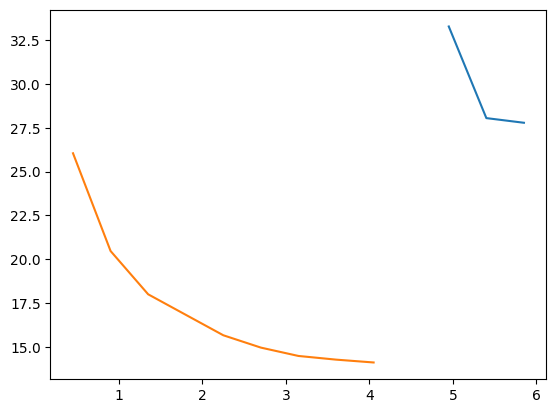

In [536]:
plt.plot(new_time50_array*0.45, new_FWHM50_array, label="50 pF")
plt.plot(rise_time*0.45, FWHM_array)

[26.04546414 20.4745634  18.00935486 15.67485727 14.97163236 14.49584449
 14.28670697 14.12462539]


Text(0, 0.5, 'FWHM (keV)')

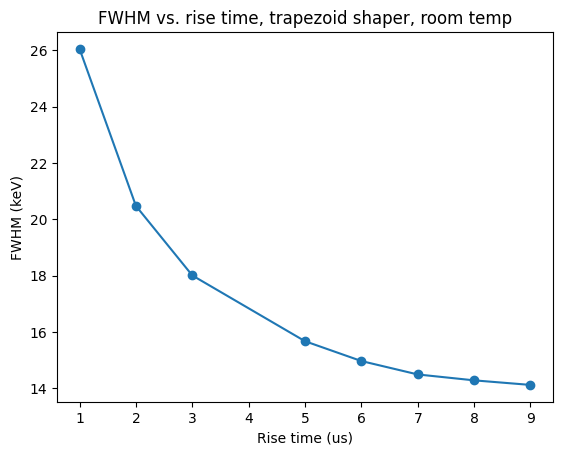

In [297]:
# Going from stdev to FWHM is FWHM = 2*sqrt(2)*stdev
stdev_array = np.array([9.963, 7.832, 6.889, 5.996, 5.727, 5.545, 5.465, 5.403])
stdev_corr_array = stdev_array * 0.924266
rise_time = np.array([1, 2, 3, 5, 6, 7, 8, 9])
FWHM_array = stdev_corr_array*2*np.sqrt(2)
print(FWHM_array)
plt.scatter(rise_time, FWHM_array)
plt.plot(rise_time, FWHM_array)
plt.title("FWHM vs. rise time, trapezoid shaper, room temp")
plt.xlabel("Rise time (us)")
plt.ylabel("FWHM (keV)")

Text(0, 0.5, 'FWHM (keV)')

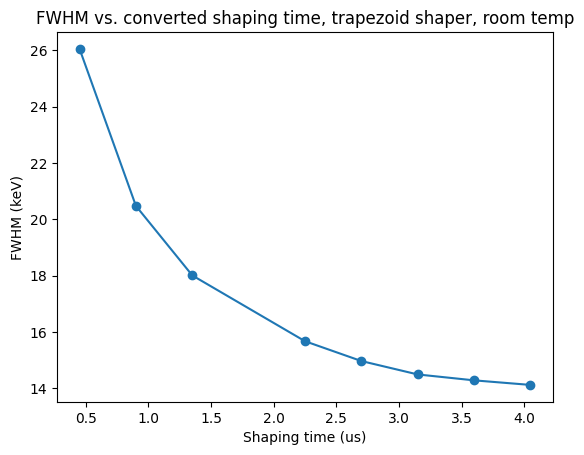

In [5]:
stdev_array = np.array([9.963, 7.832, 6.889, 5.996, 5.727, 5.545, 5.465, 5.403])
stdev_corr_array = stdev_array * 0.924266
rise_time = np.array([1, 2, 3, 5, 6, 7, 8, 9])
FWHM_array = stdev_corr_array*2*np.sqrt(2)
rise_corr_time = rise_time * 0.45

plt.plot(rise_corr_time, FWHM_array)
plt.scatter(rise_corr_time, FWHM_array)
plt.title("FWHM vs. converted shaping time, trapezoid shaper, room temp")
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (keV)")

In [76]:
file = up.open("/Users/arathisuraj/Desktop/python code/DataR_CH0@V2740B_22575_thefuckingroot.root")
file.classnames()

{'Data_R;26': 'TTree', 'Data_R;25': 'TTree'}

<TArrayS [16336, 16340, 16336, ..., 16344, 16356, 16364] at 0x0001202214c0>


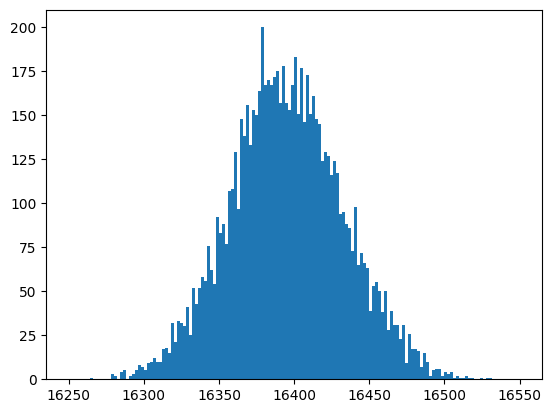

In [95]:
# NEW CODE FOR READING WAVEFORMS FROM THE FUCKING ROOT FILE
test_array = file["Data_R;25"]["Samples"]
array2 = test_array.array(library="np")
print(array2[1])
binarr = np.linspace(16250, 16550, 151)
n, b, p = plt.hist(array2[9700], bins=binarr) # visually confirm that this is the original waveform

In [ ]:
for num in range(0, 89009):
    